In [76]:
import numpy as np
import pandas as pd

import pymc3 as pm
import theano.tensor as tt

%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib 
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False
matplotlib.rcParams['axes.spines.left'] = False

PRIOR_N = 50

In [77]:
# https://projects.fivethirtyeight.com/2020-ga-runoff-data/ga_runoff_polls_2020.csv
ga_runoff = pd.read_csv('https://projects.fivethirtyeight.com/2020-ga-runoff-data/ga_runoff_polls_2020.csv')
ga_runoff.head()

,race,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,tracking,poll_id,question_id
0,2020_GA-S3,12/6/2020,Raphael Warnock,12/1/2020,12/3/2020,Trafalgar Group,1083,lv,0.629127,0.629127,45.3,47.71986,NaN,73495,137884
1,2020_GA-S3,12/6/2020,Raphael Warnock,11/19/2020,11/24/2020,RMG Research,1377,lv,0.999871,0.655129,48.0,48.39289,NaN,73492,137855
2,2020_GA-S3,12/6/2020,Raphael Warnock,11/27/2020,11/30/2020,SurveyUSA,583,lv,1.175967,1.054330,52.0,51.41203,NaN,73446,137760
3,2020_GA-S3,12/6/2020,Raphael Warnock,11/10/2020,11/10/2020,VCreek/AMG,300,lv,0.373719,0.090242,45.6,47.63507,NaN,73164,137165
4,2020_GA-S3,12/6/2020,Raphael Warnock,11/16/2020,11/16/2020,Opinion Savvy/InsiderAdvantage,800,lv,1.056206,0.473541,49.0,49.02370,NaN,73121,137097


In [78]:
candidates = ga_runoff['candidate_name'].unique().tolist()
candidates

['Raphael Warnock', 'Kelly Loeffler', 'Jon Ossoff', 'David A. Perdue']

# Warnock v Loeffler

In [79]:
# Nov 3, 2020 results used as prior (total party support used as prior)
w_pct = 0.329 + 0.066 + 0.028 + 0.022 + 0.019 + 0.009 + 0.006
l_pct = 0.259 + 0.20 + 0.01 + 0.009 + 0.008 + 0.007

# normalize the split because the race is only between the two now
w_pct_norm = w_pct / (w_pct + l_pct)
l_pct_norm = l_pct / (w_pct + l_pct)

w_pct_norm, l_pct_norm

(0.492798353909465, 0.507201646090535)

In [80]:
warnock_polls = ga_runoff[ga_runoff.candidate_name == 'Raphael Warnock']
warnock_polls

,race,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,tracking,poll_id,question_id
0,2020_GA-S3,12/6/2020,Raphael Warnock,12/1/2020,12/3/2020,Trafalgar Group,1083,lv,0.629127,0.629127,45.3,47.71986,NaN,73495,137884
1,2020_GA-S3,12/6/2020,Raphael Warnock,11/19/2020,11/24/2020,RMG Research,1377,lv,0.999871,0.655129,48.0,48.39289,NaN,73492,137855
2,2020_GA-S3,12/6/2020,Raphael Warnock,11/27/2020,11/30/2020,SurveyUSA,583,lv,1.175967,1.054330,52.0,51.41203,NaN,73446,137760
3,2020_GA-S3,12/6/2020,Raphael Warnock,11/10/2020,11/10/2020,VCreek/AMG,300,lv,0.373719,0.090242,45.6,47.63507,NaN,73164,137165
4,2020_GA-S3,12/6/2020,Raphael Warnock,11/16/2020,11/16/2020,Opinion Savvy/InsiderAdvantage,800,lv,1.056206,0.473541,49.0,49.02370,NaN,73121,137097
5,2020_GA-S3,12/6/2020,Raphael Warnock,11/8/2020,11/9/2020,Remington Research Group,1450,lv,0.954179,0.197506,48.0,48.29334,NaN,72935,136832


In [81]:
loeffler_polls = ga_runoff[ga_runoff.candidate_name == 'Kelly Loeffler']
loeffler_polls

,race,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,tracking,poll_id,question_id
6,2020_GA-S3,12/6/2020,Kelly Loeffler,12/1/2020,12/3/2020,Trafalgar Group,1083,lv,0.629127,0.629127,50.2,47.96810,NaN,73495,137884
7,2020_GA-S3,12/6/2020,Kelly Loeffler,11/19/2020,11/24/2020,RMG Research,1377,lv,0.999871,0.655129,46.0,46.27375,NaN,73492,137855
8,2020_GA-S3,12/6/2020,Kelly Loeffler,11/27/2020,11/30/2020,SurveyUSA,583,lv,1.175967,1.054330,45.0,45.40681,NaN,73446,137760
9,2020_GA-S3,12/6/2020,Kelly Loeffler,11/10/2020,11/10/2020,VCreek/AMG,300,lv,0.373719,0.090242,49.5,47.62989,NaN,73164,137165
10,2020_GA-S3,12/6/2020,Kelly Loeffler,11/16/2020,11/16/2020,Opinion Savvy/InsiderAdvantage,800,lv,1.056206,0.473541,48.0,47.76162,NaN,73121,137097
11,2020_GA-S3,12/6/2020,Kelly Loeffler,11/8/2020,11/9/2020,Remington Research Group,1450,lv,0.954179,0.197506,49.0,48.47879,NaN,72935,136832


In [82]:
poll_normalizer = warnock_polls[['pollster', 'pct']].merge(loeffler_polls[['pollster', 'pct']], on='pollster')
poll_normalizer['normalizer'] = poll_normalizer['pct_x'] + poll_normalizer['pct_y']
poll_normalizer

,pollster,pct_x,pct_y,normalizer
0,Trafalgar Group,45.3,50.2,95.5
1,RMG Research,48.0,46.0,94.0
2,SurveyUSA,52.0,45.0,97.0
3,VCreek/AMG,45.6,49.5,95.1
4,Opinion Savvy/InsiderAdvantage,49.0,48.0,97.0
5,Remington Research Group,48.0,49.0,97.0


In [83]:
for pollster in warnock_polls.pollster.unique():
    warnock_polls.loc[warnock_polls.pollster == pollster, 'pct'] = (
        warnock_polls.loc[warnock_polls.pollster == pollster, 'pct'] /
        poll_normalizer.loc[poll_normalizer.pollster == pollster, 'normalizer']
    )
warnock_polls['num_votes'] = warnock_polls['samplesize'] * warnock_polls['pct']
warnock_polls

/home/flo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/flo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,race,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,tracking,poll_id,question_id,num_votes
0,2020_GA-S3,12/6/2020,Raphael Warnock,12/1/2020,12/3/2020,Trafalgar Group,1083,lv,0.629127,0.629127,0.474346,47.71986,NaN,73495,137884,513.716230
1,2020_GA-S3,12/6/2020,Raphael Warnock,11/19/2020,11/24/2020,RMG Research,1377,lv,0.999871,0.655129,0.510638,48.39289,NaN,73492,137855,703.148936
2,2020_GA-S3,12/6/2020,Raphael Warnock,11/27/2020,11/30/2020,SurveyUSA,583,lv,1.175967,1.054330,0.536082,51.41203,NaN,73446,137760,312.536082
3,2020_GA-S3,12/6/2020,Raphael Warnock,11/10/2020,11/10/2020,VCreek/AMG,300,lv,0.373719,0.090242,0.479495,47.63507,NaN,73164,137165,143.848580
4,2020_GA-S3,12/6/2020,Raphael Warnock,11/16/2020,11/16/2020,Opinion Savvy/InsiderAdvantage,800,lv,1.056206,0.473541,0.505155,49.02370,NaN,73121,137097,404.123711
5,2020_GA-S3,12/6/2020,Raphael Warnock,11/8/2020,11/9/2020,Remington Research Group,1450,lv,0.954179,0.197506,0.494845,48.29334,NaN,72935,136832,717.525773


In [84]:
for pollster in loeffler_polls.pollster.unique():
    loeffler_polls.loc[loeffler_polls.pollster == pollster, 'pct'] = (
        loeffler_polls.loc[loeffler_polls.pollster == pollster, 'pct'].values /
        poll_normalizer.loc[poll_normalizer.pollster == pollster, 'normalizer'].values
    )
loeffler_polls['num_votes'] = loeffler_polls['samplesize'] * loeffler_polls['pct']
loeffler_polls

/home/flo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,race,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,tracking,poll_id,question_id,num_votes
6,2020_GA-S3,12/6/2020,Kelly Loeffler,12/1/2020,12/3/2020,Trafalgar Group,1083,lv,0.629127,0.629127,0.525654,47.96810,NaN,73495,137884,569.283770
7,2020_GA-S3,12/6/2020,Kelly Loeffler,11/19/2020,11/24/2020,RMG Research,1377,lv,0.999871,0.655129,0.489362,46.27375,NaN,73492,137855,673.851064
8,2020_GA-S3,12/6/2020,Kelly Loeffler,11/27/2020,11/30/2020,SurveyUSA,583,lv,1.175967,1.054330,0.463918,45.40681,NaN,73446,137760,270.463918
9,2020_GA-S3,12/6/2020,Kelly Loeffler,11/10/2020,11/10/2020,VCreek/AMG,300,lv,0.373719,0.090242,0.520505,47.62989,NaN,73164,137165,156.151420
10,2020_GA-S3,12/6/2020,Kelly Loeffler,11/16/2020,11/16/2020,Opinion Savvy/InsiderAdvantage,800,lv,1.056206,0.473541,0.494845,47.76162,NaN,73121,137097,395.876289
11,2020_GA-S3,12/6/2020,Kelly Loeffler,11/8/2020,11/9/2020,Remington Research Group,1450,lv,0.954179,0.197506,0.505155,48.47879,NaN,72935,136832,732.474227


In [85]:
# group by pollster
warnock_pollsters = (
    warnock_polls[['pollster', 'samplesize', 'num_votes']]
    .groupby('pollster')
    .agg(np.sum)
)
warnock_pollsters

,samplesize,num_votes
pollster,,
Opinion Savvy/InsiderAdvantage,800,404.123711
RMG Research,1377,703.148936
Remington Research Group,1450,717.525773
SurveyUSA,583,312.536082
Trafalgar Group,1083,513.716230
VCreek/AMG,300,143.848580


In [86]:
loeffler_pollsters = (
    loeffler_polls[['pollster', 'samplesize', 'num_votes']]
    .groupby('pollster')
    .agg(np.sum)
)
loeffler_pollsters

,samplesize,num_votes
pollster,,
Opinion Savvy/InsiderAdvantage,800,395.876289
RMG Research,1377,673.851064
Remington Research Group,1450,732.474227
SurveyUSA,583,270.463918
Trafalgar Group,1083,569.283770
VCreek/AMG,300,156.151420


In [87]:
# tune n for how much we want the model to 
alpha = int(w_pct_norm * PRIOR_N)
beta = PRIOR_N - alpha

alpha, beta

(24, 26)

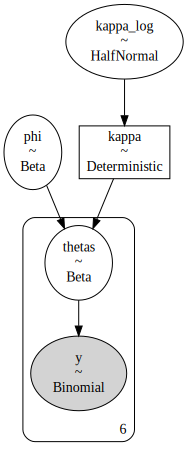

In [88]:
with pm.Model() as warnock_model:
    
    phi = pm.Beta('phi', alpha=alpha, beta=beta)

    kappa_log = pm.HalfNormal('kappa_log', sigma=1)
    kappa = pm.Deterministic('kappa', tt.exp(kappa_log))

    thetas = pm.Beta(
        'thetas', 
        alpha=phi*kappa, 
        beta=(1.0-phi)*kappa, 
        shape=len(warnock_pollsters)
    )
    
    
    y = pm.Binomial(
        'y', 
        n=warnock_pollsters['samplesize'], 
        p=thetas, 
        observed=warnock_pollsters['num_votes']
    )
    
pm.model_to_graphviz(warnock_model)

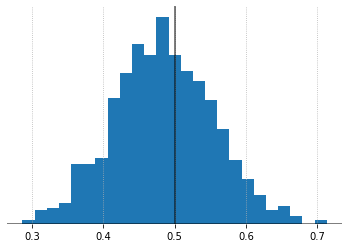

In [89]:
with warnock_model:
    warnock_prior = pm.sample_prior_predictive(samples=1000)
    
plt.hist(warnock_prior['phi'], bins=25)
plt.axhline(y=0, color='black', alpha=0.5, linewidth=2)
plt.axvline(x=0.5, color='black', alpha=0.5, linewidth=2)
plt.grid(linestyle=':')
plt.yticks([])
plt.show()

In [90]:
with warnock_model:
    #step = pm.Metropolis()
    warnock_samples = pm.sample(2000, tune=5000, cores=4, target_accept=0.999) # target_accept=0.99
    #post_pred = pm.sample_posterior_predictive(samples, 200)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [thetas, kappa_log, phi]


Sampling 4 chains for 5_000 tune and 2_000 draw iterations (20_000 + 8_000 draws total) took 38 seconds.


/home/flo/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


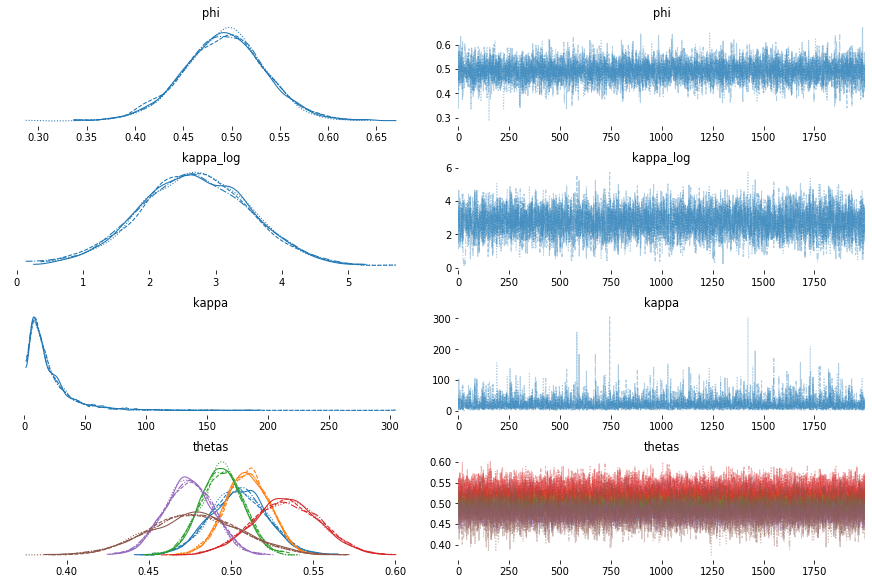

In [91]:
pm.traceplot(warnock_samples)
plt.show()

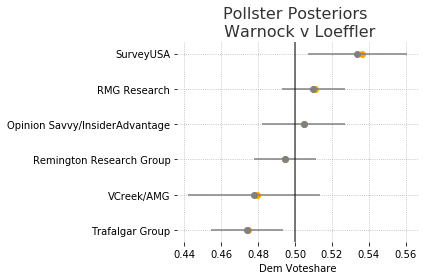

In [92]:
medians = []
errs = []
labels = []
for pollster_idx in range(warnock_samples['thetas'].shape[1]):
    _median = np.mean(warnock_samples['thetas'][:,pollster_idx])
    lower, _ = np.percentile(warnock_samples['thetas'][:,pollster_idx], (10, 90))
    err = _median - lower
    
    medians.append(_median)
    errs.append(err)
    labels.append(warnock_pollsters.index.tolist()[pollster_idx])
    
errs = [x for _,x in sorted(zip(medians, errs))]
labels = [x for _,x in sorted(zip(medians, labels))]
medians = sorted(medians)
#print(medians)

#medians, errs, labels
for idx, _median in enumerate(medians):
    plt.errorbar(x=_median, y=idx, xerr=errs[idx], fmt='o', color='gray')
for pollster_idx, pollster in enumerate(labels):
    plt.scatter(
        x=(
            warnock_pollsters[warnock_pollsters.index == pollster]['num_votes'] / 
            warnock_pollsters[warnock_pollsters.index == pollster]['samplesize']
        ), 
        y=pollster_idx, color='orange')
plt.axvline(x=0.5, color='black', alpha=0.5, linewidth=2)
plt.grid(linestyle=':')
plt.yticks(np.arange(len(warnock_pollsters)), labels)
#plt.xticks([0.46, 0.5, 0.54], ['R Advantage', 'Draw', 'D Advantage'])
plt.xlabel('Dem Voteshare')
plt.title('Pollster Posteriors \n Warnock v Loeffler', fontsize=16, alpha=0.8)
plt.tight_layout()
plt.savefig('imgs/wl_pollster-lean.png')

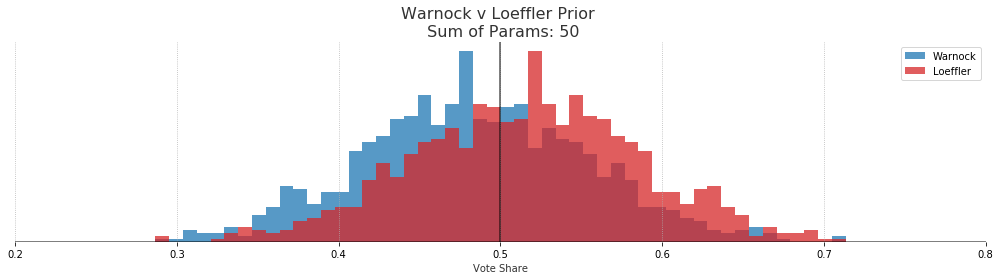

In [93]:
plt.figure(figsize=(14,4))
plt.hist(warnock_prior['phi'], color='tab:blue', alpha=0.75, bins=50, label='Warnock')
plt.hist(1. - warnock_prior['phi'], color='tab:red', alpha=0.75, bins=50, label='Loeffler')
plt.axhline(y=0, color='black', alpha=0.5, linewidth=2)
plt.axvline(x=0.5, color='black', alpha=0.5, linewidth=2)
plt.xlabel('Vote Share', alpha=0.8)
plt.yticks([])
plt.xlim([0.2, 0.8])
plt.legend()
plt.grid(linestyle=':')
plt.title('Warnock v Loeffler Prior \n Sum of Params: {}'.format(PRIOR_N), fontsize=16, alpha=0.8)
plt.tight_layout()
plt.savefig('imgs/ga_wl_{}-priors.png'.format(PRIOR_N))

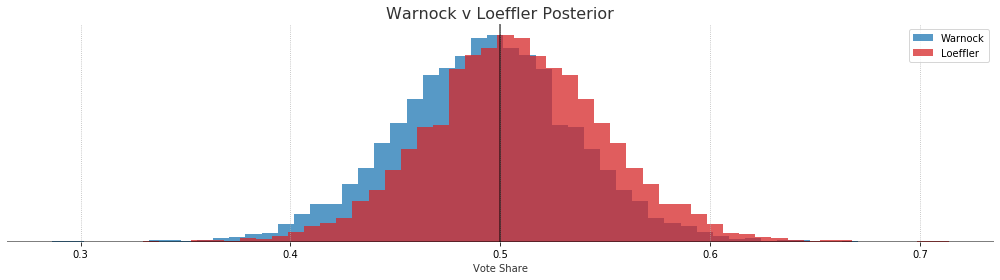

In [94]:
plt.figure(figsize=(14,4))
plt.hist(warnock_samples['phi'], color='tab:blue', alpha=0.75, bins=50, label='Warnock')
plt.hist(1. - warnock_samples['phi'], color='tab:red', alpha=0.75, bins=50, label='Loeffler')
plt.axhline(y=0, color='black', alpha=0.5, linewidth=2)
plt.axvline(x=0.5, color='black', alpha=0.5, linewidth=2)
plt.xlabel('Vote Share', alpha=0.8)
plt.yticks([])
plt.legend()
plt.grid(linestyle=':')
plt.title('Warnock v Loeffler Posterior', fontsize=16, alpha=0.8)
plt.tight_layout()
plt.savefig('imgs/ga_wl_posteriors.png')

In [95]:
np.mean(warnock_samples['phi'] > 0.5), np.mean((1. - warnock_samples['phi']) > 0.5) 

(0.429875, 0.570125)

# Ossoff v Perdue

In [96]:
# Nov 3, 2020 results used as prior
o_pct = 0.479
p_pct = 0.497

# normalize the split because the race is only between the two now
o_pct_norm = o_pct / (o_pct + p_pct)
p_pct_norm = p_pct / (o_pct + p_pct)

o_pct_norm, p_pct_norm

(0.49077868852459017, 0.5092213114754098)

In [97]:
ossoff_polls = ga_runoff[ga_runoff.candidate_name == 'Jon Ossoff']
ossoff_polls

,race,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,tracking,poll_id,question_id
12,2020_GA-S2,12/6/2020,Jon Ossoff,12/1/2020,12/3/2020,Trafalgar Group,1083,lv,0.629127,0.629127,48.0,49.51804,NaN,73495,137883
13,2020_GA-S2,12/6/2020,Jon Ossoff,11/19/2020,11/24/2020,RMG Research,1377,lv,0.999871,0.667888,48.0,48.09459,NaN,73492,137854
14,2020_GA-S2,12/6/2020,Jon Ossoff,11/27/2020,11/30/2020,SurveyUSA,583,lv,1.175967,1.058832,50.0,49.65749,NaN,73446,137759
15,2020_GA-S2,12/6/2020,Jon Ossoff,11/16/2020,11/16/2020,Opinion Savvy/InsiderAdvantage,800,lv,1.056206,0.495106,49.0,48.76981,NaN,73121,137096
16,2020_GA-S2,12/6/2020,Jon Ossoff,11/8/2020,11/9/2020,Remington Research Group,1450,lv,0.954179,0.225511,46.0,46.58860,NaN,72935,136831


In [98]:
perdue_polls = ga_runoff[ga_runoff.candidate_name == 'David A. Perdue']
perdue_polls

,race,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,tracking,poll_id,question_id
17,2020_GA-S2,12/6/2020,David A. Perdue,12/1/2020,12/3/2020,Trafalgar Group,1083,lv,0.629127,0.629127,47.3,46.17801,NaN,73495,137883
18,2020_GA-S2,12/6/2020,David A. Perdue,11/19/2020,11/24/2020,RMG Research,1377,lv,0.999871,0.667888,47.0,47.43931,NaN,73492,137854
19,2020_GA-S2,12/6/2020,David A. Perdue,11/27/2020,11/30/2020,SurveyUSA,583,lv,1.175967,1.058832,48.0,48.04940,NaN,73446,137759
20,2020_GA-S2,12/6/2020,David A. Perdue,11/16/2020,11/16/2020,Opinion Savvy/InsiderAdvantage,800,lv,1.056206,0.495106,49.0,48.89255,NaN,73121,137096
21,2020_GA-S2,12/6/2020,David A. Perdue,11/8/2020,11/9/2020,Remington Research Group,1450,lv,0.954179,0.225511,50.0,49.60260,NaN,72935,136831


In [99]:
poll_normalizer = ossoff_polls[['pollster', 'pct']].merge(perdue_polls[['pollster', 'pct']], on='pollster')
poll_normalizer['normalizer'] = poll_normalizer['pct_x'] + poll_normalizer['pct_y']
poll_normalizer

,pollster,pct_x,pct_y,normalizer
0,Trafalgar Group,48.0,47.3,95.3
1,RMG Research,48.0,47.0,95.0
2,SurveyUSA,50.0,48.0,98.0
3,Opinion Savvy/InsiderAdvantage,49.0,49.0,98.0
4,Remington Research Group,46.0,50.0,96.0


In [100]:
for pollster in ossoff_polls.pollster.unique():
    ossoff_polls.loc[ossoff_polls.pollster == pollster, 'pct'] = (
        ossoff_polls.loc[ossoff_polls.pollster == pollster, 'pct'].values /
        poll_normalizer.loc[poll_normalizer.pollster == pollster, 'normalizer'].values
    )
ossoff_polls['num_votes'] = ossoff_polls['samplesize'] * ossoff_polls['pct']
ossoff_polls

/home/flo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/flo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,race,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,tracking,poll_id,question_id,num_votes
12,2020_GA-S2,12/6/2020,Jon Ossoff,12/1/2020,12/3/2020,Trafalgar Group,1083,lv,0.629127,0.629127,0.503673,49.51804,NaN,73495,137883,545.477440
13,2020_GA-S2,12/6/2020,Jon Ossoff,11/19/2020,11/24/2020,RMG Research,1377,lv,0.999871,0.667888,0.505263,48.09459,NaN,73492,137854,695.747368
14,2020_GA-S2,12/6/2020,Jon Ossoff,11/27/2020,11/30/2020,SurveyUSA,583,lv,1.175967,1.058832,0.510204,49.65749,NaN,73446,137759,297.448980
15,2020_GA-S2,12/6/2020,Jon Ossoff,11/16/2020,11/16/2020,Opinion Savvy/InsiderAdvantage,800,lv,1.056206,0.495106,0.500000,48.76981,NaN,73121,137096,400.000000
16,2020_GA-S2,12/6/2020,Jon Ossoff,11/8/2020,11/9/2020,Remington Research Group,1450,lv,0.954179,0.225511,0.479167,46.58860,NaN,72935,136831,694.791667


In [101]:
for pollster in perdue_polls.pollster.unique():
    perdue_polls.loc[perdue_polls.pollster == pollster, 'pct'] = (
        perdue_polls.loc[perdue_polls.pollster == pollster, 'pct'].values /
        poll_normalizer.loc[poll_normalizer.pollster == pollster, 'normalizer'].values
    )
perdue_polls['num_votes'] = perdue_polls['samplesize'] * perdue_polls['pct']
perdue_polls

/home/flo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,race,modeldate,candidate_name,startdate,enddate,pollster,samplesize,population,weight,influence,pct,house_adjusted_pct,tracking,poll_id,question_id,num_votes
17,2020_GA-S2,12/6/2020,David A. Perdue,12/1/2020,12/3/2020,Trafalgar Group,1083,lv,0.629127,0.629127,0.496327,46.17801,NaN,73495,137883,537.522560
18,2020_GA-S2,12/6/2020,David A. Perdue,11/19/2020,11/24/2020,RMG Research,1377,lv,0.999871,0.667888,0.494737,47.43931,NaN,73492,137854,681.252632
19,2020_GA-S2,12/6/2020,David A. Perdue,11/27/2020,11/30/2020,SurveyUSA,583,lv,1.175967,1.058832,0.489796,48.04940,NaN,73446,137759,285.551020
20,2020_GA-S2,12/6/2020,David A. Perdue,11/16/2020,11/16/2020,Opinion Savvy/InsiderAdvantage,800,lv,1.056206,0.495106,0.500000,48.89255,NaN,73121,137096,400.000000
21,2020_GA-S2,12/6/2020,David A. Perdue,11/8/2020,11/9/2020,Remington Research Group,1450,lv,0.954179,0.225511,0.520833,49.60260,NaN,72935,136831,755.208333


In [102]:
# group by pollster
ossoff_pollsters = (
    ossoff_polls[['pollster', 'samplesize', 'num_votes']]
    .groupby('pollster')
    .agg(np.sum)
)
ossoff_pollsters

,samplesize,num_votes
pollster,,
Opinion Savvy/InsiderAdvantage,800,400.000000
RMG Research,1377,695.747368
Remington Research Group,1450,694.791667
SurveyUSA,583,297.448980
Trafalgar Group,1083,545.477440


In [103]:
# group by pollster
perdue_pollsters = (
    perdue_polls[['pollster', 'samplesize', 'num_votes']]
    .groupby('pollster')
    .agg(np.sum)
)
perdue_pollsters

,samplesize,num_votes
pollster,,
Opinion Savvy/InsiderAdvantage,800,400.000000
RMG Research,1377,681.252632
Remington Research Group,1450,755.208333
SurveyUSA,583,285.551020
Trafalgar Group,1083,537.522560


In [104]:
# tune n for how much we want the model to 
alpha = int(o_pct_norm * PRIOR_N)
beta = PRIOR_N - alpha

alpha, beta

(24, 26)

In [105]:
with pm.Model() as ossoff_model:
    
    phi = pm.Beta('phi', alpha=alpha, beta=beta)

    kappa_log = pm.HalfNormal('kappa_log', sigma=1)
    kappa = pm.Deterministic('kappa', tt.exp(kappa_log))

    thetas = pm.Beta(
        'thetas', 
        alpha=phi*kappa, 
        beta=(1.0-phi)*kappa, 
        shape=len(ossoff_pollsters)
    )
    
    y = pm.Binomial(
        'y', 
        n=ossoff_pollsters['samplesize'], 
        p=thetas, 
        observed=ossoff_pollsters['num_votes']
    )

In [106]:
with ossoff_model:
    ossoff_prior = pm.sample_prior_predictive(samples=1000)

In [107]:
with ossoff_model:
    #step = pm.Metropolis()
    ossoff_samples = pm.sample(2000, tune=5000, cores=4, target_accept=0.999) # target_accept=0.99

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [thetas, kappa_log, phi]


Sampling 4 chains for 5_000 tune and 2_000 draw iterations (20_000 + 8_000 draws total) took 37 seconds.


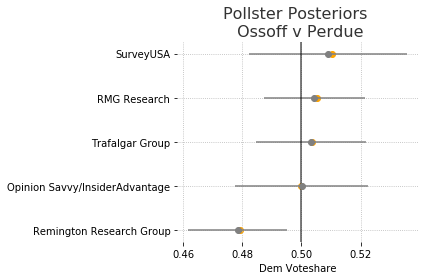

In [108]:
medians = []
errs = []
labels = []
for pollster_idx in range(ossoff_samples['thetas'].shape[1]):
    _median = np.mean(ossoff_samples['thetas'][:,pollster_idx])
    lower, _ = np.percentile(ossoff_samples['thetas'][:,pollster_idx], (10, 90))
    err = _median - lower
    
    medians.append(_median)
    errs.append(err)
    labels.append(ossoff_pollsters.index.tolist()[pollster_idx])
    
errs = [x for _,x in sorted(zip(medians, errs))]
labels = [x for _,x in sorted(zip(medians, labels))]
medians = sorted(medians)
#print(medians)

#medians, errs, labels
for idx, _median in enumerate(medians):
    plt.errorbar(x=_median, y=idx, xerr=errs[idx], fmt='o', color='gray')
    
for pollster_idx, pollster in enumerate(labels):
    plt.scatter(
        x=(
            ossoff_pollsters[ossoff_pollsters.index == pollster]['num_votes'] / 
            ossoff_pollsters[ossoff_pollsters.index == pollster]['samplesize']
        ), 
        y=pollster_idx, color='orange')
plt.axvline(x=0.5, color='black', alpha=0.5, linewidth=2)
plt.grid(linestyle=':')
plt.yticks(np.arange(len(ossoff_pollsters)), labels)
plt.xlabel('Dem Voteshare')
#plt.xticks([0.48, 0.5, 0.52], ['R Advantage', 'Draw', 'D Advantage'])
plt.title('Pollster Posteriors \n Ossoff v Perdue', fontsize=16, alpha=0.8)
plt.tight_layout()
plt.savefig('imgs/op_pollster-lean.png')

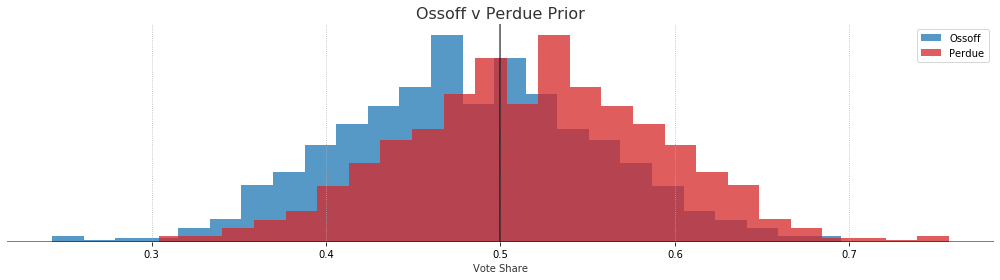

In [109]:
plt.figure(figsize=(14,4))
plt.hist(ossoff_prior['phi'], color='tab:blue', alpha=0.75, bins=25, label='Ossoff')
plt.hist(1. - ossoff_prior['phi'], color='tab:red', alpha=0.75, bins=25, label='Perdue')
plt.axhline(y=0, color='black', alpha=0.5, linewidth=2)
plt.axvline(x=0.5, color='black', alpha=0.5, linewidth=2)
plt.xlabel('Vote Share', alpha=0.8)
plt.yticks([])
plt.legend()
plt.grid(linestyle=':')
plt.title('Ossoff v Perdue Prior', fontsize=16, alpha=0.8)
plt.tight_layout()
plt.savefig('imgs/ga_op_{}-priors.png'.format(PRIOR_N))

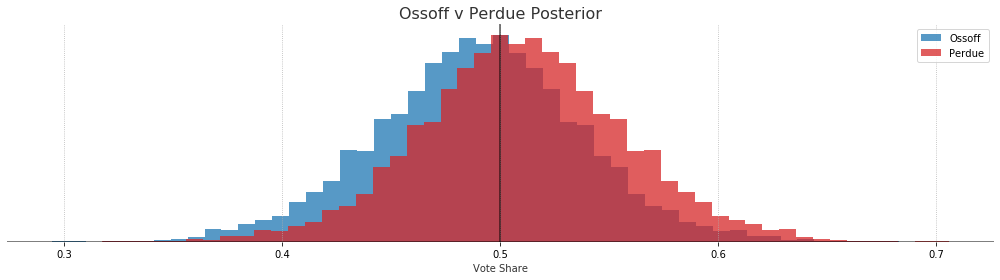

In [110]:
plt.figure(figsize=(14,4))
plt.hist(ossoff_samples['phi'], color='tab:blue', alpha=0.75, bins=50, label='Ossoff')
plt.hist(1. - ossoff_samples['phi'], color='tab:red', alpha=0.75, bins=50, label='Perdue')
plt.axhline(y=0, color='black', alpha=0.5, linewidth=2)
plt.axvline(x=0.5, color='black', alpha=0.5, linewidth=2)
plt.xlabel('Vote Share', alpha=0.8)
plt.yticks([])
plt.legend()
plt.grid(linestyle=':')
plt.title('Ossoff v Perdue Posterior', fontsize=16, alpha=0.8)
plt.tight_layout()
plt.savefig('imgs/ga_op_posteriors.png')

In [111]:
np.mean(ossoff_samples['phi'] > 0.5), np.mean((1. - ossoff_samples['phi']) > 0.5) 

(0.418875, 0.581125)